In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

DATA_PATH = 'data/'

data = pd.read_csv(DATA_PATH + 'p2-arbres-fr.csv', sep=';')

In [3]:
# Variables redondantes et presque vides
# On garde genre plutot que libelle car il y a plus de données et moins de modalités

var_inutiles = ['lieu', 'id_emplacement', 'type_emplacement']
var_vides = ['complement_addresse', 'numero', 'espece', 'variete', 'libelle_francais']
var_drop = var_inutiles + var_vides

df = data.drop(var_drop, axis=1)
df['remarquable'] = df.remarquable.isna()

In [36]:
# Extraction de datasets
from sklearn.preprocessing import OneHotEncoder

# Coordonnées 
data_geo = df[['geo_point_2d_a', 'geo_point_2d_b']]

# Dominalité
dom_list = ['Alignement', 'Jardin', 'CIMETIERE']

temp = df[df['circonference_cm'] < 600]
temp = temp[temp['hauteur_m'] < 200]
temp = temp[temp.domanialite.isin(dom_list)]

new_name = {0: 'Alignement',
         1: 'CIMETIERE', 
         2: 'Jardin'}

dom = temp[['circonference_cm', 'hauteur_m', 'domanialite']].dropna()
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_dom = pd.DataFrame(encoder.fit_transform(dom[['domanialite']]).toarray())
final_dom = dom.join(encoder_dom)
final_dom.rename(columns = new_name, inplace = True)

# Age de l'arbre
temp = df[df['circonference_cm'] < 600]
temp = temp[temp['hauteur_m'] < 200]
dev = temp[['circonference_cm', 'hauteur_m', 'stade_developpement']].dropna()

dev['A'] = dev['stade_developpement'] == 'A'
dev['J'] = dev['stade_developpement'] == 'J'
dev['M'] = dev['stade_developpement'] == 'M'
dev['JA'] = dev['stade_developpement'] == 'JA'

In [51]:
temp = df[df['circonference_cm'] < 600]
temp = temp[temp['hauteur_m'] < 200]
full = temp[['stade_developpement', 'domanialite']].dropna()

full['A'] = full['stade_developpement'] == 'A'
full['J'] = full['stade_developpement'] == 'J'
full['M'] = full['stade_developpement'] == 'M'
full['JA'] = full['stade_developpement'] == 'JA'
full['Alignement'] = full['domanialite'] == 'Alignement'
full['Cimetière'] = full['domanialite'] == 'CIMETIERE'
full['Jardin'] = full['domanialite'] == 'Jardin'

# Data explo

## Domanialite

(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'Alignement'),
  Text(0, 1.5, 'Jardin'),
  Text(0, 2.5, 'CIMETIERE')])

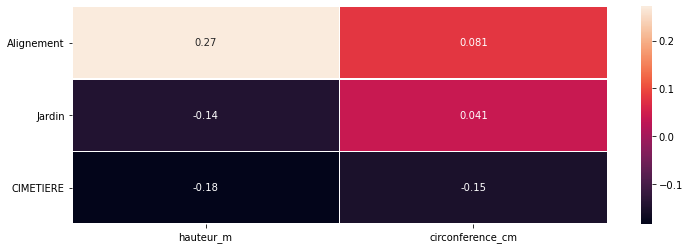

In [47]:
cr = final_dom.corr()
final_cr = cr.loc[['Alignement', 'Jardin', 'CIMETIERE'], ['hauteur_m', 'circonference_cm']]
sns.heatmap(final_cr, annot=True, linewidths=.7)

fig = plt.gcf()
fig.set_size_inches(12, 4)
plt.yticks(rotation=0)

Correlation plus difficile à trouver avec la circonference qu'avec la hauteur.
Il ya un vrai lien entre l'usage de l'arbre et ses caractéristiques.

## Stade de développement

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'A'), Text(0, 1.5, 'J'), Text(0, 2.5, 'M'), Text(0, 3.5, 'JA')])

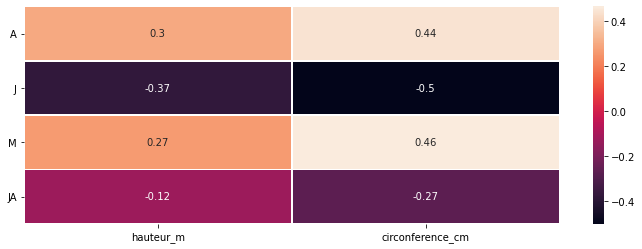

In [48]:
cr = dev.corr()
final_cr = cr.loc[['A', 'J', 'M', 'JA'], ['hauteur_m', 'circonference_cm']]
sns.heatmap(final_cr, annot=True, linewidths=.7)

fig = plt.gcf()
fig.set_size_inches(12, 4)
plt.yticks(rotation=0)

## recherche 

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'A'), Text(0, 1.5, 'J'), Text(0, 2.5, 'M'), Text(0, 3.5, 'JA')])

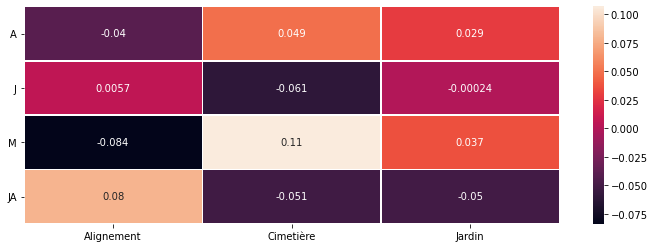

In [55]:
cr = full.corr().loc[['A', 'J', 'M', 'JA'], ['Alignement', 'Cimetière', 'Jardin']]

sns.heatmap(cr, annot=True, linewidths=.7)

fig = plt.gcf()
fig.set_size_inches(12, 4)
plt.yticks(rotation=0)